# Linear Regression

## Introduction

Linear regression is a machine learning algorithm dealing with a continuous data and is considered a supervised machine learning algorithm. Linear regression is a useful tool for predicting a quantitative response. Though it may look just like another statistical methods, linear reguression is a good jumping point for newer approaches in machine learning. 


In linear regression we are interested if we can model the relationship between two variables. For example, in a HDB Resale Price dataset, we may be interested to ask if we can predict the resale price if we know the floor size. In the simplest case, we have an independent variable $x$ and a dependent variable $y$ in our data collection. The linear regression algorithm will try to model the relationship between these two variables as a straight line equation.

$$ y = m x + c$$

In this sense, the model consists of the two coefficients $m$ and $c$. Once we know these two coefficients, we will be able to predict the value of $y$ for any $x$.

## Hypothesis

We can make our straight line equation as our hypothesis. This simply means we make a hypothesis that the relationship between the independent variable and the dependent variable is a straight line. To generalize it, we will write down our hypothesis as follows.

$$y = \beta_0 + \beta_1 x$$

where we can see that $\beta_0$ is the constant $c$ and $\beta_1$ is the gradient $m$. The purpose of our learning algorithm is to find an estimate for $\beta_0$ and $\beta_1$ given the values of $x$ and $y$. Let's see what this means on our actual data. Recall that we have previously work with HDB Resale price dataset. We will continue to use this as our example. In the codes below, we read the dataset, and choose resale price from TAMPINES and plot the relationship between the resale price and the floor area.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

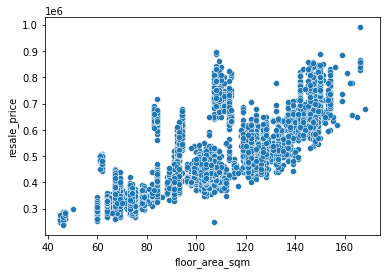

In [7]:
file_url = 'https://www.dropbox.com/s/jz8ck0obu9u1rng/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv?raw=1'
df = pd.read_csv(file_url)
df_tampines = df.loc[df['town'] == 'TAMPINES',:]
sns.scatterplot(y='resale_price', x='floor_area_sqm', data=df_tampines)

Notice that the resale price increases as the floor area increases. So we can make a hypothesis by creating a straight line equation that predicts the resale price given the floor area data. The figure below shows the plot of a straight line and the existing data together.

<AxesSubplot:xlabel='floor_area_sqm', ylabel='resale_price'>

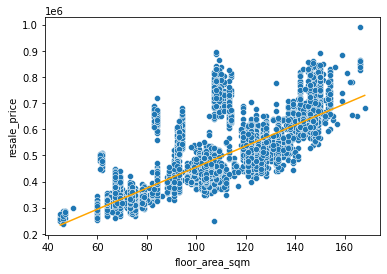

In [9]:
y = 52643 + 4030 * df['floor_area_sqm']
sns.scatterplot(y='resale_price', x='floor_area_sqm', data=df_tampines)
sns.lineplot(y=y, x='floor_area_sqm', data=df_tampines, color='orange')

Note that in the above code, we created a straight line equation with the following coefficients:
$$\beta_0 = 52643$$
and
$$\beta_1 = 4030$$


In machine learning, we call $\beta_0$ and $\beta_1$ as the model *coefficents* or *parameters*. What we want is to use our training data set to produce estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ for the model coefficients. In this way, we can **predict** future resale prices by computing

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

where $\hat{y}$ indicates a prediction of $Y$. Note that we use the *hat* symbol to denote the estimated value for an unknown parameter or coefficient or to denote the predicted value. The predicted value is also called a hypothesis.

## Cost Function

In order to find the values of $\hat{\beta}_0$ and $\hat{\beta}_1$, we will apply optimization algorithm that minimizes the error. The error caused by the difference between our predicted value $\hat{y}$ and the actual data $y$ is captured in a *cost function*. Let's find our cost function for this linear regression model.

We can get the error by taking the difference between the actual value and our hypothesis and square them. The square is to avoid cancellation due to positive and negative differences. This is to get our absolute errors. For one particular data point $i$, we can get the error square as follows.

$$e^i = \left(\hat{y}(x^i) - y^i\right)^2$$

Assume we have $m$ data points, we can then sum over all data points to get the Residual Sum Square (RSS) of the errors.

$$RSS = \Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)^2$$

We can then choose the following equation as our cost function.

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)^2$$

The division by $m$ is to get an average over all data points. The constant 2 in the denominator is make the derivative easier to calculate.

The learning algorithm will then try to obtain the constant $\hat{\beta}_0$ and $\hat{\beta}_1$ that minimizes the cost function.

$$\begin{matrix}\text{minimize} & J(\hat{\beta}_0, \hat{\beta}_1)\\
\hat{\beta}_0, \hat{\beta}_1\\ \end{matrix}$$

## Gradient Descent

One of the algorithm that we can use to find the constants by minimizing the cost function is called *gradient descent*. The algorithm starts by some initial guess of the constants and use the gradient of the cost function to make a prediction where to go next to reach the bottom or the minimum of the function. In this way, some initial value of $\hat{\beta}_0$ and $\hat{\beta}_1$, we can calculate the its next values using the following equation.

$$\hat{\beta}_j = \hat{\beta}_j - \alpha \frac{\partial}{\partial \hat{\beta}_j} J(\hat{\beta}_0, \hat{\beta}_1)$$

In order to understand the above equation, let's take a look at a two countour plot below.

<img src="https://www.dropbox.com/s/87td2jxzjguh4qw/gradient_descent.png?raw=1"  style="width: 720px;"/>


The contour plot shows the minimum somewhere in the centre. The idea of gradient descent is that we move the fastest to the minimum if we choose to move in the direction with the steepest slope. The steepest slope can be found from the gradient of the function. Let's look at point $x_0$ in the figure. The gradient in the direction of $\beta_0$ is non zero as can be seen from the contour since it is perpendicular to the contour lines. On the other hand, the gradient in the direction of $\beta_1$ is zero as it is parallel with the contour line at $x_0$. Recall that contour lines show the points with the same value. When the points have the same values, the gradient is zero. We can then substitute this into the above equation.

$$\hat{\beta}_0 = \hat{\beta}_0 - \alpha \frac{\partial}{\partial \hat{\beta}_0} J$$

$$\hat{\beta}_1 = \hat{\beta}_1 - \alpha \frac{\partial}{\partial \hat{\beta}_1} J$$

The partial derivative with respect to $\beta_0$ is non-zero while the derivative with respect to $\beta_1$ is zero. So we have the following:

$$\hat{\beta}_0 = \hat{\beta}_0 - \alpha \times m $$

$$\hat{\beta}_1 = \hat{\beta}_1 $$

where $m$ is the gradient in $\beta_0$ direction which is the partial derivative $\partial J/\partial\hat{\beta}_0$. If the optimum is a minima, then $m < 0$, a negative value. Now, we can see how the next point increases in $\beta_0$ direction but not in $\beta_1$ direction at $x_0$.

$$\hat{\beta}_0 = \hat{\beta}_0 + \delta $$

$$\hat{\beta}_1 = \hat{\beta}_1 $$

When the gradient in the $\beta_1$ direction is no longer zero as in the subsequent steps, both $\beta_0$ and $\beta_1$ increases by some amount.

$$\hat{\beta}_0 = \hat{\beta}_0 + \delta_0 $$

$$\hat{\beta}_1 = \hat{\beta}_1 + \delta_1 $$

We can actually calculate the derivative of the cost function analytically.

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)^2$$

$$\frac{\partial}{\partial \hat{\beta}_j} J(\hat{\beta}_0, \hat{\beta}_1) = \frac{\partial}{\partial \hat{\beta}_j} \frac{1}{2m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)^2$$

We can substitute our straight line equation into $\hat{y}$ to give the following.

$$\frac{\partial}{\partial \hat{\beta}_j} J(\hat{\beta}_0, \hat{\beta}_1) = \frac{\partial}{\partial \hat{\beta}_j} \frac{1}{2m}\Sigma_{i=1}^m\left(\hat{\beta}_0 + \hat{\beta}_1 x^i - y^i\right)^2$$

Now we will differentiate the above equation with respect to $\hat{\beta}_0$ and $\hat{\beta}_1$. 

Let's first do it for $\hat{\beta}_0$. 

$$\frac{\partial}{\partial \hat{\beta}_0} J(\hat{\beta}_0, \hat{\beta}_1) =  \frac{1}{m}\Sigma_{i=1}^m\left(\hat{\beta}_0 + \hat{\beta}_1 x^i - y^i\right)$$

or

$$\frac{\partial}{\partial \hat{\beta}_0} J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)$$

Now, we need to do the same by differentiating it with respect to $\hat{\beta}_1$.

$$\frac{\partial}{\partial \hat{\beta}_1} J(\hat{\beta}_0, \hat{\beta}_1) =  \frac{1}{m}\Sigma_{i=1}^m\left(\hat{\beta}_0 + \hat{\beta}_1 x^i - y^i\right) x^i$$

or

$$\frac{\partial}{\partial \hat{\beta}_1} J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right) x^i$$

Now we have the equation to calculate the next values of $\hat{\beta}_0$ and $\hat{\beta}_1$ using gradient descent.

$$\hat{\beta}_0 = \hat{\beta}_0 - \alpha \frac{1}{m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)$$

$$\hat{\beta}_1 = \hat{\beta}_1 - \alpha \frac{1}{m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)x^i$$

## Matrix Operations

We can calculate these operations using matrix calculations. 

### Hypothesis

Recall that our hypothesis (predicted value) for one data point was written as follows.

$$\hat{y}(x^i) = \hat{\beta}_0 + \hat{\beta}_1 x^i$$

If we have $m$ data points, we will then have a set of equations.

$$\hat{y}(x^1) = \hat{\beta}_0 + \hat{\beta}_1 x^1$$
$$\hat{y}(x^2) = \hat{\beta}_0 + \hat{\beta}_1 x^2$$
$$\ldots$$
$$\hat{y}(x^m) = \hat{\beta}_0 + \hat{\beta}_1 x^m$$

We can rewrite this in terms of matrix multiplication. First, we write our independent variable $x$ as a column vector.

$$\begin{bmatrix}
x^1\\
x^2\\
\ldots\\
x^m
\end{bmatrix}$$

To write the system equations, we need to add a column of constant 1s into our independent column vector.

$$\mathbf{X} = \begin{bmatrix}
1 & x^1\\
1 & x^2\\
\ldots & \ldots\\
1 &x^m
\end{bmatrix}$$

and our constants as a column vector too.

$$\mathbf{\hat{b}} = \begin{bmatrix}
\hat{\beta}_0\\
\hat{\beta}_1
\end{bmatrix}$$



Our system equations can then be written as

$$\mathbf{\hat{y}} = \mathbf{X} \times \mathbf{\hat{b}}$$

The result of this matrix multiplication is a column vector of $m\times 1$. Note that in the above matrix equation, we use $\mathbf{\hat{y}}$ to denote the column vector of *predicted* value or our hypothesis. 

### Cost Function

Recall that the cost function is written as follows.

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

We can rewrite the square as a multiplication instead and make use of matrix multplication to express it.

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)\times \left(\hat{y}(x^i)-y^i\right)$$

Writing it as matrix multiplication gives us the following.

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}(\mathbf{\hat{y}}-\mathbf{y})^T\times (\mathbf{\hat{y}}-\mathbf{y})$$

### Gradient Descent

Recall that our gradient descent equations update functions were written as follows. 

$$\hat{\beta}_0 = \hat{\beta}_0 - \alpha \frac{1}{m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)$$

$$\hat{\beta}_1 = \hat{\beta}_1 - \alpha \frac{1}{m}\Sigma_{i=1}^m\left(\hat{y}(x^i) - y^i\right)x^i$$

And recall that our independent variable is a column vector with constant 1 appended into the first column.

$$\mathbf{X} = \begin{bmatrix}
1 & x^1\\
1 & x^2\\
\ldots & \ldots\\
1 &x^m
\end{bmatrix}$$

Transposing this column vector results in

$$\mathbf{X}^T = \begin{bmatrix}
1 & 1 & \ldots & 1\\
x^1 & x^2 & \ldots & x^m\\
\end{bmatrix}$$


Note that we can write the update function summation also as a matrix operations.

$$\mathbf{\hat{b}} = \mathbf{\hat{b}} - \alpha \frac{1}{m}\mathbf{X}^T \times (\mathbf{\hat{y}} - \mathbf{y})$$

Substituting the equation for $\mathbf{\hat{y}}$, we get the following equation.

$$\mathbf{\hat{b}} = \mathbf{\hat{b}} - \alpha \frac{1}{m}\mathbf{X}^T \times (\mathbf{X} \times \mathbf{\hat{b}} - \mathbf{y})$$

In this notation, the capital letter notation indicates matrices and small letter notation indicates vector. Those without bold notation are constants.

## Metrics

After we build our model, we usually want to evaluate how good our model is. We use metrics to evaluate our model or hypothesis. To do this, we should split the data into two:
- training data set
- test data set

The training data set is used to build the model or the hypothesis. The test data set, on the other hand, is used to evaluate the model by computing some metrics.


### Mean Squared Error

One metric we can use here is called the mean squared error. The mean squred error is computed as follows.

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$

where $n$ is the number of predicted data points in the *test* data set, $y^i$ is the actual value in the *test* data set, and $\hat{y}^i$ is the predicted value obtained using the hypothesis and the independent variable $x^i$ in the *test* data set.

### R2 Coefficient of Determination

Another metric is called the $r^2$ coefficient or the coefficient of determination. This is computed as follows.

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where

$$SS_{res} = \Sigma_{i=1}^n (y_i - \hat{y}_i)^2$$ where $y_i$ is the actual target value and $\hat{y}_i$ is the predicted target value.

$$SS_{tot} = \Sigma_{i=1}^n (y_i - \overline{y})^2$$

where 
$$ \overline{y} = \frac{1}{n} \Sigma_{i=1}^n y_i$$
and $n$ is the number of target values.

This coefficient gives you how close the data is to a straight line. The closer it is to a straight line, the value will be close to 1.0. This means there is a correlation between the independent variable and the dependent variable. When there is no correlation, the value will be close to 0.

In your problem sets, you will work on writing a code to do all these tasks.